In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from Game import game

done


In [2]:
actions = ["u", "d", "l", "r"]

In [41]:
env = game(game_size=10)
locations_encoded = np.zeros((env.game_size+1, env.game_size+1)) 
i = 0
for x in range(env.game_size+1):
    for y in range(env.game_size+1):
        locations_encoded[x, y] = i
        i += 1

In [42]:
# 4 -> # of actions
# 2 sizes multiplied is location of snake head and apple
Q = np.zeros((
    (env.game_size+1)**2,
    (env.game_size+1)**2,
    len(actions)
))

In [48]:
def encode_position(position):
    x = position[0]
    y = position[1]
    try:
        locations_encoded[x, :]
    except IndexError:
        x -=1
    try:
        locations_encoded[x, y]
    except IndexError:
        y -=1
        
    return int(locations_encoded[x, y])

In [52]:
rewards = []
EPISODES = 100000
MAX_STEPS = 100
LEARNING_RATE = 0.81
GAMMA = 0.96
epsilon = 0.9
render = False

for episode in range(EPISODES):
    env = game(game_size=10)
    current_reward = 0
    if episode % 100 == 0:
        print (f"{episode/EPISODES*100}%")
    for _ in range(MAX_STEPS):
        head_pos = env.snake.head.pos
        apple = env.apple
        snake_pos_encoded = encode_position(head_pos)
        apple_pos_encoded = encode_position(apple)
        if render:
            env.draw()
        
        x = np.random.uniform(0, 1)
        #print (f"{x} < {epsilon} -> {x < epsilon}")
        if np.random.uniform(0, 1) < epsilon:
            action = random.randint(0, len(actions)-1)
        else:
            # Sample random action
            if [i for i in Q[snake_pos_encoded, apple_pos_encoded, :] if i != 0]:
                action = np.argmax(Q[snake_pos_encoded, apple_pos_encoded, :])
            else:
                action = random.randint(0, len(actions)-1)
        
        # Take action
        reward, new_env, end = env.run_cycle(actions[action])
        current_reward += reward
        
        # Update Q-values
        next_head_pos = new_env.snake.head.pos
        next_apple = new_env.apple
        next_snake_pos_encoded = encode_position(next_head_pos)
        next_apple_pos_encoded = encode_position(next_apple)
        Q[snake_pos_encoded, apple_pos_encoded, action] = Q[snake_pos_encoded, apple_pos_encoded, action] + LEARNING_RATE *(reward + GAMMA * np.max(Q[next_snake_pos_encoded, next_apple_pos_encoded, :])- Q[snake_pos_encoded, apple_pos_encoded, action]) 
        
        env = new_env
        if end:
            rewards.append(current_reward)
            if epsilon > 0:
                epsilon -= 0.001
            break
            

0.0%
0.1%
0.2%
0.3%
0.4%
0.5%
0.6%
0.7000000000000001%
0.8%
0.8999999999999999%
1.0%
1.0999999999999999%
1.2%
1.3%
1.4000000000000001%
1.5%
1.6%
1.7000000000000002%
1.7999999999999998%
1.9%
2.0%
2.1%
2.1999999999999997%
2.3%
2.4%
2.5%
2.6%
2.7%
2.8000000000000003%
2.9000000000000004%
3.0%
3.1%
3.2%
3.3000000000000003%
3.4000000000000004%
3.5000000000000004%
3.5999999999999996%
3.6999999999999997%
3.8%
3.9%
4.0%
4.1000000000000005%
4.2%
4.3%
4.3999999999999995%
4.5%
4.6%
4.7%
4.8%
4.9%
5.0%
5.1%
5.2%
5.3%
5.4%
5.5%
5.6000000000000005%
5.7%
5.800000000000001%
5.8999999999999995%
6.0%
6.1%
6.2%
6.3%
6.4%
6.5%
6.6000000000000005%
6.7%
6.800000000000001%
6.9%
7.000000000000001%
7.1%
7.199999999999999%
7.3%
7.3999999999999995%
7.5%
7.6%
7.7%
7.8%
7.9%
8.0%
8.1%
8.200000000000001%
8.3%
8.4%
8.5%
8.6%
8.7%
8.799999999999999%
8.9%
9.0%
9.1%
9.2%
9.3%
9.4%
9.5%
9.6%
9.700000000000001%
9.8%
9.9%
10.0%
10.100000000000001%
10.2%
10.299999999999999%
10.4%
10.5%
10.6%
10.7%
10.8%
10.9%
11.0%
11.1%
11

87.2%
87.3%
87.4%
87.5%
87.6%
87.7%
87.8%
87.9%
88.0%
88.1%
88.2%
88.3%
88.4%
88.5%
88.6%
88.7%
88.8%
88.9%
89.0%
89.1%
89.2%
89.3%
89.4%
89.5%
89.60000000000001%
89.7%
89.8%
89.9%
90.0%
90.10000000000001%
90.2%
90.3%
90.4%
90.5%
90.60000000000001%
90.7%
90.8%
90.9%
91.0%
91.10000000000001%
91.2%
91.3%
91.4%
91.5%
91.60000000000001%
91.7%
91.8%
91.9%
92.0%
92.10000000000001%
92.2%
92.30000000000001%
92.4%
92.5%
92.60000000000001%
92.7%
92.80000000000001%
92.9%
93.0%
93.10000000000001%
93.2%
93.30000000000001%
93.4%
93.5%
93.60000000000001%
93.7%
93.8%
93.89999999999999%
94.0%
94.1%
94.19999999999999%
94.3%
94.39999999999999%
94.5%
94.6%
94.69999999999999%
94.8%
94.89999999999999%
95.0%
95.1%
95.19999999999999%
95.3%
95.39999999999999%
95.5%
95.6%
95.7%
95.8%
95.89999999999999%
96.0%
96.1%
96.2%
96.3%
96.39999999999999%
96.5%
96.6%
96.7%
96.8%
96.89999999999999%
97.0%
97.1%
97.2%
97.3%
97.39999999999999%
97.5%
97.6%
97.7%
97.8%
97.89999999999999%
98.0%
98.1%
98.2%
98.3%
98.4%
98.5%
98.6

Text(0.5, 0, "Episodes (100's)")

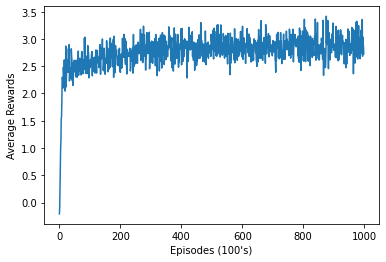

In [53]:
def get_avg(vals):
    return sum(vals)/len(vals)

avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_avg(rewards[i:i+100]))
    
plt.plot(avg_rewards)
plt.ylabel('Average Rewards')
plt.xlabel("Episodes (100's)")

In [72]:
def get_prediction(env):
    actions = ["u", "d", "l", "r"]
    head_pos = env.snake.head.pos
    apple = env.apple
    snake_pos_encoded = encode_position(head_pos)
    apple_pos_encoded = encode_position(apple)
    
    if np.random.uniform(0, 1) < epsilon:
        action = random.randint(0, len(actions)-1)
    else:
        # Sample random action
        if [i for i in Q[snake_pos_encoded, apple_pos_encoded, :] if i != 0]:
            action = np.argmax(Q[snake_pos_encoded, apple_pos_encoded, :])
        else:
            action = random.randint(0, len(actions)-1)
        
    return actions[action]      

In [82]:
import time
import os
from IPython.display import clear_output
env = game(game_size=10)
env.draw()
end = False
score = 0
while not end:
    action = get_prediction(env)
    reward, _, end = env.run_cycle(action)
    if reward == 0.7:
        score += 1
    #clear_output()
    env.draw(score=score)
    time.sleep(0.1)
print ("Done")

-----------
-----------
-----------
-----------
-------*---
-----------
-----------
-----------
-----------
-----------
-@---------

 0
-----------
-----------
-----------
-----------
-----------
-------*---
-----------
-----------
-----------
-----------
-@---------

 0
-----------
-----------
-----------
-----------
-----------
------*----
-----------
-----------
-----------
-----------
-@---------

 0
-----------
-----------
-----------
-----------
-----------
-----------
------*----
-----------
-----------
-----------
-@---------

 0
-----------
-----------
-----------
-----------
-----------
-----------
-----------
------*----
-----------
-----------
-@---------

 0
-----------
-----------
-----------
-----------
-----------
-----------
-----------
-------*---
-----------
-----------
-@---------

 0
-----------
-----------
-----------
-----------
-----------
-----------
-----------
-----------
-------*---
-----------
-@---------

 0
-----------
-----------
-----------
-----------
